In [1]:
import numpy as np
import pandas as pd
from coba.benchmarks import Result

In [3]:
result = Result.from_file("./benchmarks/benchmark_medish.log")

In [8]:
l,s,b = result.to_pandas()

repeat_cols = { col:np.repeat(b[col].values, b['N'].str.len()) for col in b.columns.drop(['N','reward']) }
spread_cols = { col:np.concatenate(b[col].values) for col in ['N', 'reward'] }
index_col   = { "index":1+np.concatenate([ np.arange(i) for i in b['N'].str.len() ]) }

r = pd.DataFrame({**repeat_cols, **spread_cols, **index_col})

In [101]:
pca_ids = s[s['pipe'].str.contains("PCA")].simulation_id.values
std_ids = s[~s['pipe'].str.contains("PCA")].simulation_id.values
cmp_ids = b.simulation_id.value_counts().reset_index(name="count").query(f"count == {len(l)}")["index"]

<AxesSubplot:xlabel='index'>

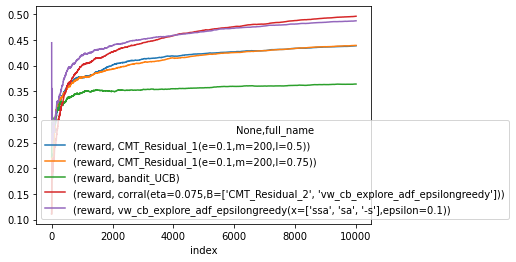

In [168]:
is_complete_std = r.simulation_id.isin(std_ids) & r.simulation_id.isin(cmp_ids)
pd.merge(r[is_complete_std],l).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0).expanding().mean().plot()

<AxesSubplot:xlabel='index'>

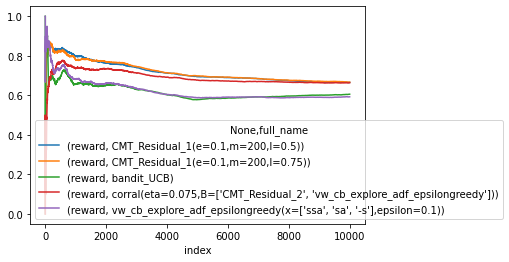

In [169]:
select = r.simulation_id.isin(pca_ids) & r.simulation_id.isin(cmp_ids)
pd.merge(r[select],l).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0).expanding().mean().plot()